In [89]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv("data.csv", sep=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [91]:
# check for missing values in each column
print("Missing values:", df.isna().sum().any())

Missing values: False


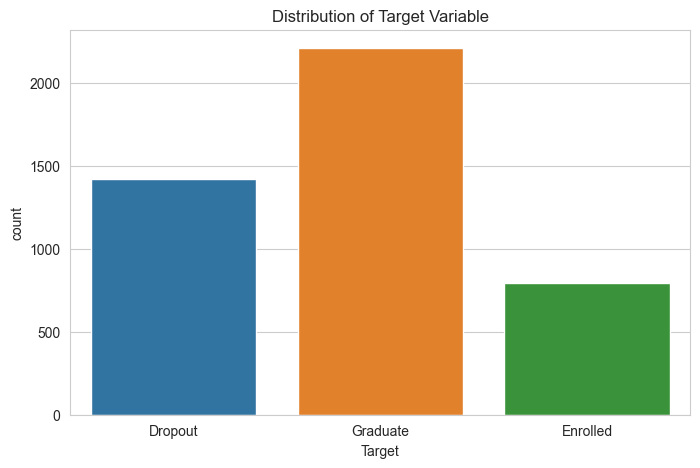

In [92]:
# plot the distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Target")
plt.title("Distribution of Target Variable")
plt.show()

In [93]:
# Plotting histograms for each column in the dataset
num_columns = len(df.columns)
plt.figure(figsize=(20, 4 * num_columns))
'''
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_columns, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()
'''

for col in df.columns:
    length = len(df[col].unique())
    #if (length < 10):
    print(col,":", length)

Marital status : 6
Application mode : 18
Application order : 8
Course : 17
Daytime/evening attendance	 : 2
Previous qualification : 17
Previous qualification (grade) : 101
Nacionality : 21
Mother's qualification : 29
Father's qualification : 34
Mother's occupation : 32
Father's occupation : 46
Admission grade : 620
Displaced : 2
Educational special needs : 2
Debtor : 2
Tuition fees up to date : 2
Gender : 2
Scholarship holder : 2
Age at enrollment : 46
International : 2
Curricular units 1st sem (credited) : 21
Curricular units 1st sem (enrolled) : 23
Curricular units 1st sem (evaluations) : 35
Curricular units 1st sem (approved) : 23
Curricular units 1st sem (grade) : 805
Curricular units 1st sem (without evaluations) : 11
Curricular units 2nd sem (credited) : 19
Curricular units 2nd sem (enrolled) : 22
Curricular units 2nd sem (evaluations) : 30
Curricular units 2nd sem (approved) : 20
Curricular units 2nd sem (grade) : 786
Curricular units 2nd sem (without evaluations) : 10
Unemploym

<Figure size 2000x14800 with 0 Axes>

Features
Name, type, unique count or range

Marital Status - Categorical - 6
Application Mode - Categorical - 18
Application Order - Continuous - 0 to 10
Course - Categorical - 17
Daytime/evening attendance - binary - 2
Previous qualifications - Categorical - 17

In [105]:
def encode_target(x):
    if x == "Graduate":
        return 1
    elif x == "Dropout":
        return 0
    else:
        return x

df = df[df['Target'].isin(['Dropout', 'Graduate'])]

prepared_df = pd.DataFrame()

# one hot encoding for categorical variables with small number of unique values
one_hot_encoded_marital = pd.get_dummies(df['Marital status'], prefix='Marital status')

prepared_df = pd.concat([prepared_df, one_hot_encoded_marital], axis=1)

# ordinal variables
ordinal_column_names = ['Application order']
prepared_df = pd.concat([prepared_df, df[ordinal_column_names]], axis=1)

# binary variables
binary_column_names = ['Daytime/evening attendance\t', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
prepared_df = pd.concat([prepared_df, df[binary_column_names]], axis=1)

# continuous variables
continuous_column_names = ['Admission grade', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']
prepared_df = pd.concat([prepared_df, df[continuous_column_names]], axis=1)

scaler = StandardScaler()
prepared_df[continuous_column_names] = scaler.fit_transform(prepared_df[continuous_column_names]) # z-scaling
# prepared_df.head()


# encoding the target column
df_target = df['Target'].apply(encode_target)
# print(df_target)

x = prepared_df
y = df_target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training and testing data shape", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = LogisticRegression()

model.fit(x_train, y_train)

print("score: ", model.score(x_test, y_test))

# find proportion in test set
class_proportions = y_test.value_counts(normalize=True)
baseline_accuracy = class_proportions.max()
print("Baseline accuracy:", baseline_accuracy)





Training and testing data shape (2541, 20) (1089, 20) (2541,) (1089,)
score:  0.758494031221304
Baseline accuracy: 0.6198347107438017
